# ABOUT THE DATA

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [3]:
data=pd.read_csv("Predicting heart disease.csv")
data.head(303)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [343]:
data.shape

(303, 14)

In [344]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [345]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [340]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [346]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [334]:
data.sex=data.sex.astype(object)
data.sex[data.sex==1]='M'
data.sex[data.sex==0]='F'

C:\Users\Ishan Srivastava\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ishan Srivastava\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [335]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,M,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,M,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,F,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,M,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,F,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,F,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,M,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,M,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,M,0,130,131,0,1,115,1,1.2,1,1,3,0


# ANALYSING THE DATA

([<matplotlib.patches.Wedge at 0x2b456011ec8>,
 [Text(-0.5986245291714798, 0.9228481310997082, 'Male'),
  Text(0.5986244427681994, -0.9228481871469777, 'Female')])

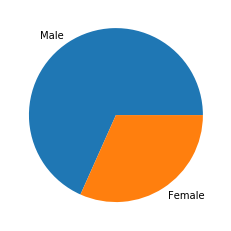

In [297]:
m=data.sex[data.sex=='M'].count()
f=data.sex[data.sex=='F'].count()
plt.pie([m,f],labels=['Male','Female'])

Text(0.5, 1.0, 'CHOLESTROL WITH RESPECT TO AGE')

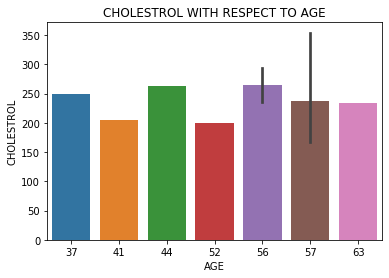

In [298]:
sns.barplot(data.age.head(10),data.chol.head(10))
plt.xlabel('AGE')
plt.ylabel('CHOLESTROL')
plt.title('CHOLESTROL WITH RESPECT TO AGE')

Text(0.5, 1.0, 'THALACH WITH RESPECT TO AGE')

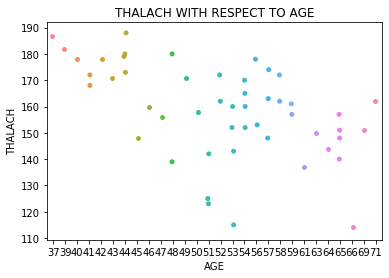

In [299]:
sns.stripplot(x=data['age'].head(50),y=data['thalach'].head(50))
plt.xlabel('AGE')
plt.ylabel('THALACH')
plt.title('THALACH WITH RESPECT TO AGE')

Text(0.5, 1.0, 'HISTOGRAM FOR OLDPEAK')

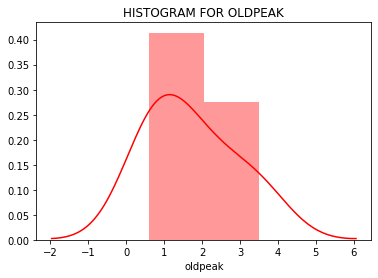

In [300]:
sns.distplot(data['oldpeak'].head(),color='red')
plt.title("HISTOGRAM FOR OLDPEAK")

Text(0.5, 1.0, 'OLDPEAK WITH RESPECT TO AGE')

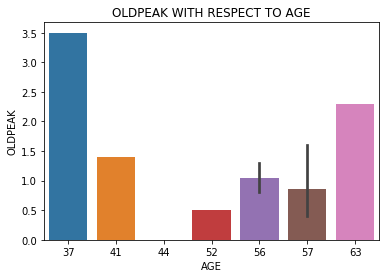

In [301]:
sns.barplot(data.age.head(10),data.oldpeak.head(10))
plt.xlabel('AGE')
plt.ylabel('OLDPEAK')
plt.title('OLDPEAK WITH RESPECT TO AGE')

([<matplotlib.patches.Wedge at 0x2b454b20408>,
 [Text(0.9824265171174377, 0.4948112149744599, 'FBS-1'),
  Text(-0.9824265402812213, -0.4948111689837548, 'FBS-0')])

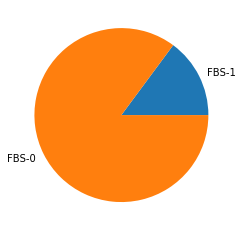

In [302]:
m=data.fbs[data.fbs==1].count()
f=data.fbs[data.fbs==0].count()
plt.pie([m,f],labels=['FBS-1','FBS-0'])

([<matplotlib.patches.Wedge at 0x2b454b53e88>,
 [Text(-0.028890980649451736, 1.0996205305636637, 'restecg-1'),
  Text(0.028891083603355697, -1.09962052785869, 'restecg-0')])

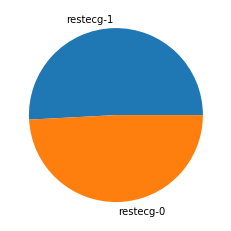

In [303]:
m=data.restecg[data.restecg==1].count()
f=data.restecg[data.restecg==0].count()
plt.pie([m,f],labels=['restecg-1','restecg-0'])

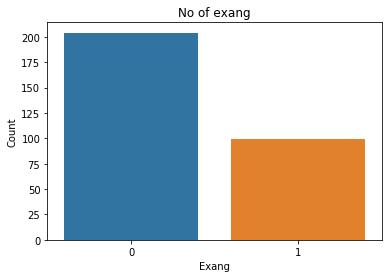

In [304]:
sns.countplot(data['exang'])
plt.title("No of exang")
plt.xlabel('Exang')
plt.ylabel('Count')
plt.show()

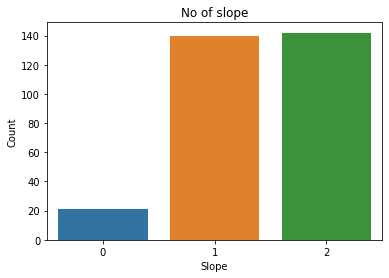

In [305]:
sns.countplot(data['slope'])
plt.title("No of slope")
plt.xlabel('Slope')
plt.ylabel('Count')
plt.show()

([<matplotlib.patches.Wedge at 0x2b454603d08>,
 [Text(0.8595064665934333, 0.6864755158664229, 'ca-1'),
  Text(-1.0997635060469528, -0.022808567848820502, 'ca-0'),
  Text(0.673025535412936, -0.8700785186879004, 'ca-2'),
  Text(1.0472143864532493, -0.3366630790647302, 'ca-3'),
  Text(1.0985221801690697, -0.05700017260144113, 'ca-4')])

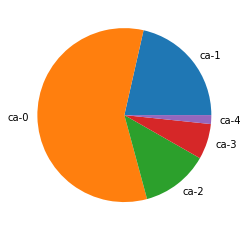

In [306]:
a=data.ca[data.ca==1].count()
b=data.ca[data.ca==0].count()
c=data.ca[data.ca==2].count()
d=data.ca[data.ca==3].count()
e=data.ca[data.ca==4].count()
plt.pie([a,b,c,d,e],labels=['ca-1','ca-0','ca-2','ca-3','ca-4'])

([<matplotlib.patches.Wedge at 0x2b454469288>,
 [Text(1.0806448414421241, 0.2054427576346433, 'thal-1'),
  Text(-0.563203326477006, 0.9448820101183191, 'thal-2'),
  Text(0.37682149414091837, -1.033443545411846, 'thal-3')])

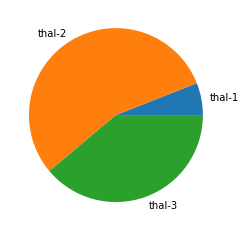

In [307]:
a=data.thal[data.thal==1].count()
c=data.thal[data.thal==2].count()
d=data.thal[data.thal==3].count()
plt.pie([a,c,d],labels=['thal-1','thal-2','thal-3'])

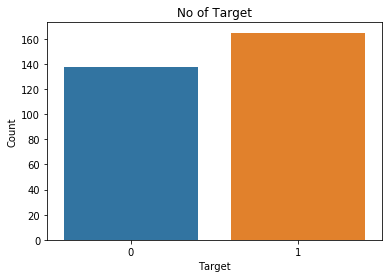

In [308]:
sns.countplot(data['target'])
plt.title("No of Target")
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# DETECTING OUTLIERS

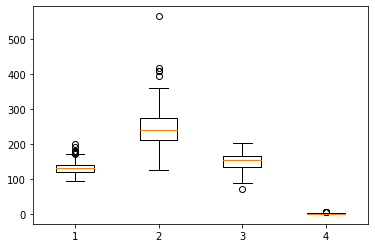

In [353]:
col1 = data.trestbps.values
col2 = data.chol.values
col3 = data.thalach.values
col4 = data.oldpeak.values
dat=[col1,col2,col3,col4]
bp=plt.boxplot(dat)
plt.show()

In [347]:
k=sts.zscore(data.trestbps)
m=data.trestbps[k>3]
data.trestbps[k>3]

223    200
248    192
Name: trestbps, dtype: int64

In [348]:
k=sts.zscore(data.chol)
m=data.chol[k>3]
data.chol[k>3]

28     417
85     564
220    407
246    409
Name: chol, dtype: int64

In [349]:
k=sts.zscore(data.thalach)
m=data.thalach[k<-3]
data.thalach[k<-3]

272    71
Name: thalach, dtype: int64

In [350]:
k=sts.zscore(data.oldpeak)
m=data.oldpeak[k>3]
data.oldpeak[k>3]

204    6.2
221    5.6
Name: oldpeak, dtype: float64

# Build a correlation matrix to identify relevant variables

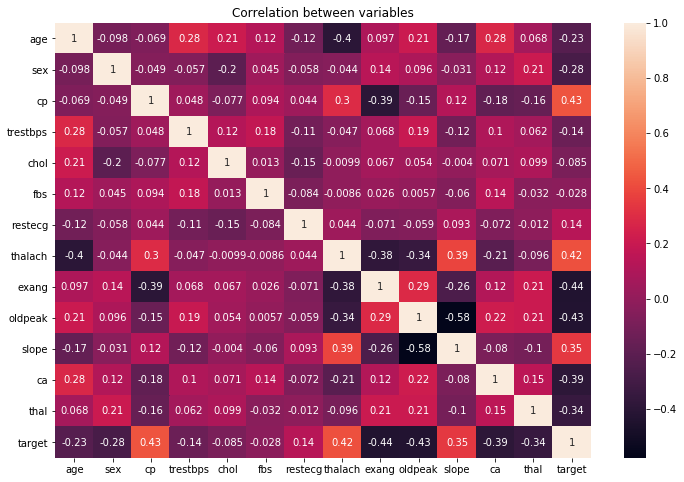

In [352]:
plt.figure(figsize=(12,8))
plt.title('Correlation between variables')
sns.heatmap(data.corr(),annot=True)